# Verwendung von kafe2 auf dem Jupyter-Server

Die folgenden Beispiele sollten auf dem Jupyter-Server ohne Probleme ausführbar sein. Folgen Sie den Kommentaren in den Beispielen, um zu sehen, wie Sie [kafe2](https://etpwww.etp.kit.edu/~quast/kafe2/htmldoc/index.html) für die Auswertung Ihrer Praktikumsversuche in Jupyter-notebook verwenden können. Beginnen Sie z.B. damit die für Ihren Fall passende Code-Zelle in Ihr Protokoll zu kopieren und passen Sie Daten und Modell-Funktion an Ihre Messung an. 

Wenn Sie kafe2 intensiver nutzen und verstehen möchten lohnt es sich etwas Zeit darauf zu verwenden, um ein wenig in der Dokumentation zu stöbern. Das Programm-Paket kafe2 ist *open source* und mit einigen Zusatzpaketen rein python-basiert installierbar. 

## Anpassung eines benutzerdefinierten Modells die Daten

Im folgenden Code-Beispiel aus der Dokumentation von kafe2 sehen Sie die allgemeine Verwendung für die Anpassung einer beliebigen Modell-Funktion, die Sie zuvor definiert haben, and die Daten. In diesem Fall handelt es sich um eine Exponentialfunktion 

$$
f(x) = A_{0}\,\exp\left(-x/\tau\right)
$$

mit den freien Parametern $A_{0}$ und $\tau$. 

########
# Data #
########

    X Data  X Data Error  X Data Correlation Matrix      
    ======  ============  ===============================
    0.8019  0.3           [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    1.84    0.3           [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
    1.942   0.3           [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
    1.276   0.3           [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
    2.84    0.3           [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
    3.488   0.3           [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    3.776   0.3           [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
    4.555   0.3           [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
    4.477   0.3           [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
    5.376   0.3           [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

    Y Data    Y Data Error  Y Data Correlation Matrix      
    ========  ============  ===============================
    0.2651    0.106         [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    0.1473    0.05891       [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
    0.08077   0.03231       [0. 0. 

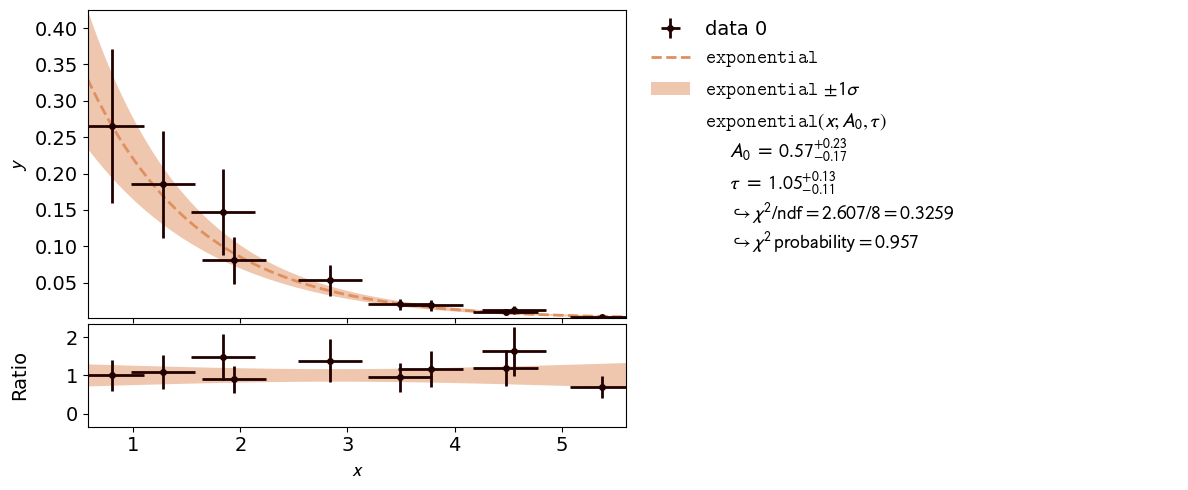

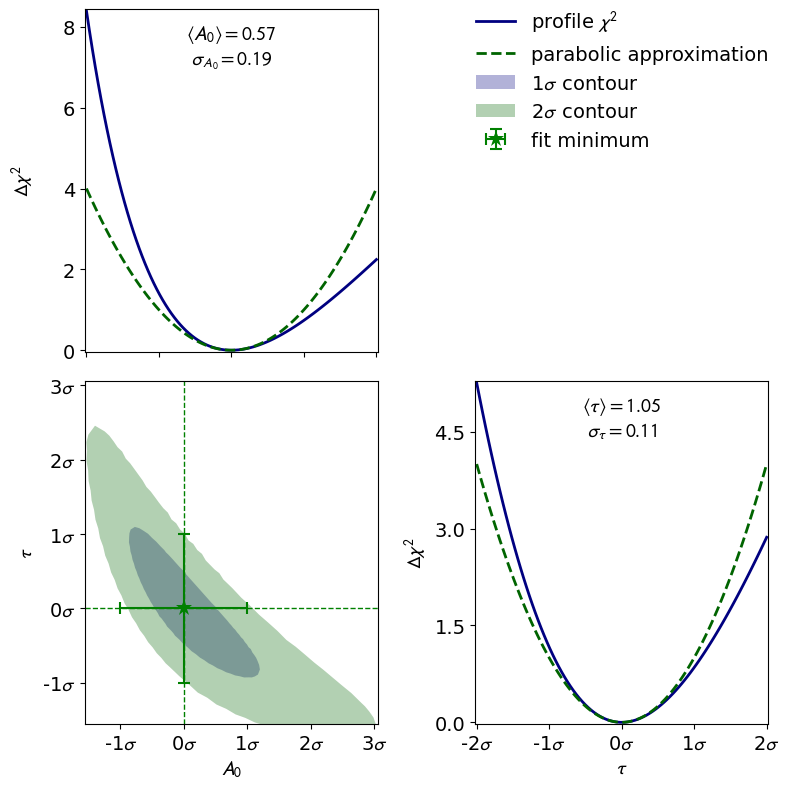

In [1]:
# Hier importieren Sie die relevanten Module und Objekte von numpy und kafe2.
# Im Fall von kafe2 handelt es sich um die Objekte vom Typ Fit, Plot und 
# ContourProfiler
import numpy as np
from kafe2 import Fit, Plot, ContoursProfiler

# Dies ist die Modell-Funktion, die Sie an die Daten anpassen möchten. In 
# diesem Fall eine Exponentialfunktion mit den parametern A_0 und tau.
def exponential(x, A_0=1, tau=1):
    return A_0 * np.exp(-x/tau)

# Hier machen Sie python Ihre Datenpunkte bekannt. Vergessen Sie nicht, dass 
# der Fit für jeden Datenpunkt einen x- und y-Wert UND entsprechende Unsicher-
# heiten in x und y verlangt! Die Übergabe erfolgt in Form von python Listen; 
# die i-ten Einträge jeder Liste gehören zusammen, wie aus dem Beispiel leicht 
# ersichtlich sein sollte. Die hier angegebenen Punkte sind frei erfunden. 
# -----------------------------------------------------------------------------
# Werte in x; im Weiteren ist x vom Format einer Liste 
x = [8.018943e-01, 1.839664e+00, 1.941974e+00, 1.276013e+00, 2.839654e+00, 3.488302e+00,
     3.775855e+00, 4.555187e+00, 4.477186e+00, 5.376026e+00]
# Unsicherheiten in x. Hier ist für xerr ein einzelner Wert angegeben, der dann 
# "pars pro toto" für alle Werte in x verwendet wird.
xerr = 3.000000e-01
# Werte in y;  im Weiteren ist y vom Format einer Liste. Die Länge von y muss 
# mit der Länge von x identisch sein, damit intern Wertepaare (x, y) daraus 
# erzeugt werden können.
y = [2.650644e-01, 1.472682e-01, 8.077234e-02, 1.850181e-01, 5.326301e-02, 1.984233e-02,
     1.866309e-02, 1.230001e-02, 9.694612e-03, 2.412357e-03]
# Unsicherheiten in y. Hier wird wieder eine Liste von Werten übergeben, deren 
# Länge dann mit der Länge der Listen für x und y identisch sein muss.
yerr = [1.060258e-01, 5.890727e-02, 3.230893e-02, 7.400725e-02, 2.130520e-02, 7.936930e-03,
        7.465238e-03, 4.920005e-03, 3.877845e-03, 9.649427e-04]

# Hier wird ein Objekt vom Typ Fit mit Namen fit erzeugt. Der Konstruktor 
# erhält zwei Argumente: data ist eine Liste aus den Listen der Werte in x und 
# y; model_function ist technisch ein Zeiger (pointer) auf die oben definierte 
# Funktion exponential.
fit = Fit(data=[x, y], model_function=exponential)
# Hier machen Sie dem Fit die Unsicherheiten in x und y bekannt. 
fit.add_error(axis='x', err_val=xerr)  # add the x-error to the fit
fit.add_error(axis='y', err_val=yerr)  # add the y-errors to the fit

# Hier wird der Fit initiiert und schließlich das Fit-Ergebnis abgefragt.
fit.do_fit()  # perform the fit
fit.report(asymmetric_parameter_errors=True)  # print a report with asymmetric uncertainties

# Hier stellen Sie die Datenpunkte und die angepasste Modell-Funktion graphisch 
# dar. Hierzu erzeugen Sie ein Objekt vom Typ Plot mit Namen plot. Das Objekt 
# fit wird als Argument an den Konstruktor von plot übergeben. Damit sind plot 
# sowohl die Datenpunkte und deren Unsicherheiten als auch das angepasste 
# Modell mit allen optimierten Parametern und wiederum deren Unsicherheiten 
# bekannt. Zwei weitere Optionen werden hier (wahlweise) übergeben: zum einen
# sollen die Fehlerbalken im Fall von asymmetrischen Konfidenzintervallen nicht
# symmetrisiert werden; zum anderen soll in der Darstellung ein sog. ratio plot 
# (die Darstellung vdes Verhältnisses: Beobachtung über der Modellvorhersage) 
# mit dargestellt werden. 
plot = Plot(fit)
plot.plot(asymmetric_parameter_errors=True, ratio=True)  # ratio = data / model function

# Diese Option zeigt Ihnen die Kontouren der Unsicherheiten aller involvierten 
# Fit-Parameter an. In diesem Fall sind dies A_0 und tau. 
cpf = ContoursProfiler(fit)
cpf.plot_profiles_contours_matrix()  # plot the contour profile matrix for all parameters

# Diesen Aufruf benötigen Sie, um die Graphiken wirklich auf dem Bildschirm 
# auszugeben und in diesem Fall auch im Jupyter-notebook einzubinden. 
plot.show()

## Lineare Anpassung an die Daten

Im folgenden Code-Beispiel aus der Dokumentation von kafe2 sehen Sie die Verwendung für die Anpassung einer Geraden and die Daten. Dieses Beispiel ist konzeptionell etwas einfacher, als das vorherige, es zeigt jedoch einige weitere *features*, die Sie für Ihre Auswertungen nutzen können. 

########
# Data #
########

    X Data  X Data Error  X Data Correlation Matrix
    ======  ============  =========================
    1.0     0.1           [1. 0. 0. 0.]            
    2.0     0.1           [0. 1. 0. 0.]            
    3.0     0.1           [0. 0. 1. 0.]            
    4.0     0.1           [0. 0. 0. 1.]            

    Y Data  Y Data Error  Y Data Correlation Matrix
    ======  ============  =========================
    2.3     0.4           [1. 0. 0. 0.]            
    4.2     0.4           [0. 1. 0. 0.]            
    7.5     0.4           [0. 0. 1. 0.]            
    9.4     0.4           [0. 0. 0. 1.]            

#########
# Model #
#########

    Model Function

        linear_model(x; a, b) = a * x + b

    X Model
    1.0    
    2.0    
    3.0    
    4.0    

    Y Model
    2.176  
    4.625  
    7.075  
    9.524  

###############
# Fit Results #
###############

    Model Parameters

        a = 2.45 +/- 0.21
        b = -0.27 +/- 0.57

    M

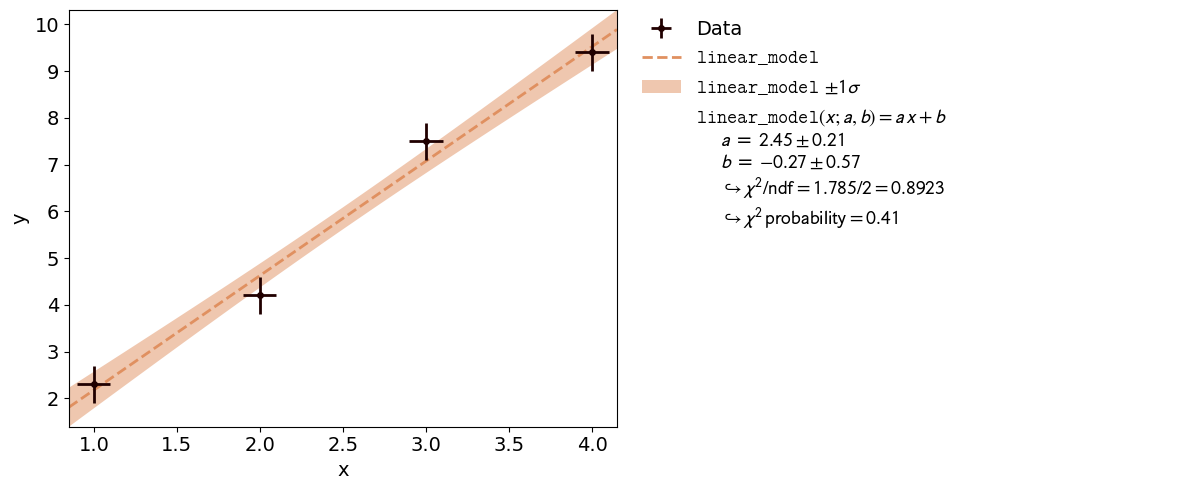

In [2]:
# Hier importieren Sie die relevanten Module und Objekte von kafe2. In diesem 
# Fall handelt es sich um die Objekte vom Typ Fit, Plot und XYContainer
from kafe2 import XYContainer, Fit, Plot

# Hier erzeugen Sie einen Container-Objekt, in dem Sie etwas kompakter die 
# Datenpunkte Ihrer Messung als (x, y)-Wertepaare verwalten können. Es handelt 
# sich dabei um die Punkte (1.0, 2.3), (2.0, 4.2), (3.0, 7.5) und (4.0, 9.4).
xy_data = XYContainer(x_data=[1.0, 2.0, 3.0, 4.0],
                      y_data=[2.3, 4.2, 7.5, 9.4])

# In diesem Beispiel geben wir für alle Punkte in x und y eine einheitliche 
# Unsicherheit an.
xy_data.add_error(axis='x', err_val=0.1)
xy_data.add_error(axis='y', err_val=0.4)

# Das ist der Name, den die Datenpunkte ggf. in einer Legende erhalten.  
xy_data.label = 'Data'  # How the data is called in plots

# Hier legen Sie wieder ein Objekt vom Typ Fit an. In diesem Fall trägt es den 
# Namen line_fit. Beachten Sie, dass wir in diesem Fall die Datne nicht als 
# python Listen Übergeben, sondern mit Hilfe des Container-Objekts xy_data. 
# Außerdem geben wir keine zuvor definierte Fit-Funktion an. Wenn im Konstruktor 
# für linear_fit keine fit-Funktioon angegeben wird per default eine lineare 
# Anpassung (f=a*x+b) mit den Parametern a und b vorgenommen.
line_fit = Fit(data=xy_data)

# Hier wird der Fit initiiert und schließlich das Fit-Ergebnis abgefragt.
line_fit.do_fit()  # This will throw a warning if no errors were specified.
line_fit.report()

# Hier werden die Datenpunkte und die angepasste Modell-Funktion wieder 
# graphisch dargestellt. 
plot = Plot(fit_objects=line_fit)  # Create a kafe2 plot object.
plot.x_label = 'x'  # Set x axis label.
plot.y_label = 'y'  # Set y axis label.
plot.plot()  # Do the plot.

# Mit diesem Aufruf speichern Sie die dargestellte Graphik nicht nur in Ihrem 
# Jupyter-notebook, sondern auch als png-Datei in Ihrer Arbeitsumgebung. 
# plot.save()  # Saves the plot to file 'fit.png' .
# plot.save('my_fit.pdf')  # Saves the plot to a different file / with a different file extension.

# Diesen Aufruf brauchen Sie, um die Graphiken wirklich auf dem Bildschirm 
# auszugeben und in diesem Fall auch im Jupyter-notebook einzubinden. 
plot.show()  # Just a convenience wrapper for matplotlib.pyplot.show() .
# NOTE: Calling matplotlib.pyplot.show() closes all figures by default so call this AFTER saving.